In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import pandas as pd
import plotly.io as pio
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from IPython.display import clear_output

from Classes.bar import Bar
from Utils.plot_utils import PlotsAndMeasures
from Utils.utils import GetMeasures

In [3]:
def plot_stability(list_of_alternations, num_rounds):
	fig, axes = plt.subplots(
		len(list_of_alternations), 2, 
		figsize=(10, 3.5*len(list_of_alternations))
	)
	for i, alternations in enumerate(list_of_alternations):
		# Detect number of agents
		num_agents = len(alternations[0])
		# Create bar object
		bar = Bar(
			num_agents=num_agents,
			threshold=0.5
		)
		bar.history = alternations * (num_rounds // len(alternations)) + alternations[:num_rounds % len(alternations)]
		attendance_file_name = 'alternations.png'
		bar.render(
			file=attendance_file_name,
			num_rounds=len(bar.history)
		)
		# Create dataframe
		n = np.prod(np.array(bar.history).shape)
		df = pd.DataFrame({
			'id_sim':[0]*n,
			'round':np.array([[i]*num_agents for i in range(len(bar.history))]).flatten(), 
			'attendance':np.stack([np.array(bar.history).sum(axis=1).reshape(-1, 1)]*num_agents, axis=1).flatten(),
			'id_player':[i for i in range(num_agents)]*len(bar.history),
			'decision':np.array(bar.history).flatten(),
			'score':[np.nan]*n,
			'model':[f'Test_{len(alternations)}']*n,
			'threshold':[0.5]*n,
			'num_agents':[num_agents]*n,
		})
		# Create plots and measures object
		p = PlotsAndMeasures(df)
		# Plot histogram
		hist_file_name = 'hist.png'
		ax = p.plot_hist_states(
			file=hist_file_name,
			T=np.inf
		)
		# Find entropy and conditional entropy
		entropy = GetMeasures.entropy(df)
		conditional_entropy = GetMeasures.conditional_entropy(df)
		# Plot
		axes[i, 0].imshow(plt.imread(attendance_file_name))
		axes[i, 1].imshow(plt.imread(hist_file_name))
		axes[i, 0].axis('off')
		axes[i, 1].axis('off')
		axes[i, 1].set_title(f'{entropy=}\n{conditional_entropy=}')
	clear_output(wait=True)
	fig.savefig('stability.png', dpi=300)
	fig.show()


/var/folders/pc/08jfyvdx7_1b_0dnj5kpf4qw0000gn/T/ipykernel_88790/215204669.py:52: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


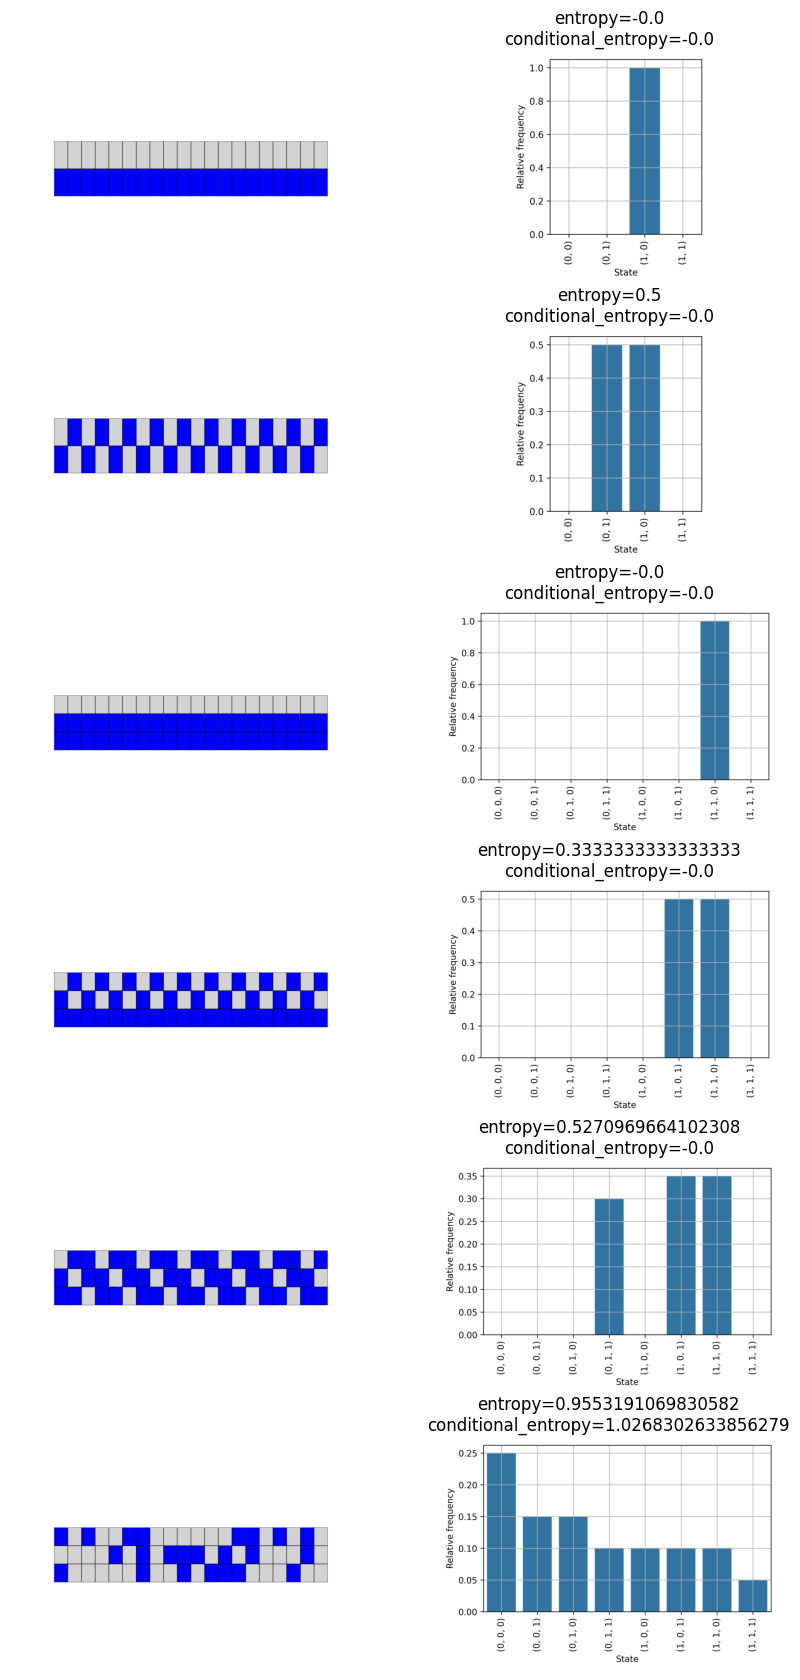

In [4]:
num_rounds = 20
list_of_alternations = [
	[[1, 0]],
	[[1, 0], [0, 1]],
	[[1, 1, 0]],
	[[1, 1, 0], [1, 0, 1]],
	[[1, 1, 0], [1, 0, 1], [0, 1, 1]],
	[np.random.randint(0, 2, 3).tolist() for _ in range(num_rounds)],
]
plot_stability(list_of_alternations, num_rounds)